<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_06_Notebook_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Representação de Textos**
---


### Álgebra Linear

Ramo da matemática que estuda os espaços vetoriais e as operações em vetores. Em Python, a manipulação de vetores de acordo com a álgebra linear pode ser facilmente feita através da biblioteca `numpy`.

In [ ]:
import numpy as np

Vetores podem ser instanciados pelo método *`array`* e variantes como *`zeros`* e *`ones`*

In [ ]:
vetor1 = np.array([1., 2., 1., 4.])
vetor2 = np.zeros(4)
vetor3 = np.ones(4)

print('Vetor 1:', vetor1)
print('Vetor 2:', vetor2)
print('Vetor 3:', vetor3)

Vetor 1: [1. 2. 1. 4.]
Vetor 2: [0. 0. 0. 0.]
Vetor 3: [1. 1. 1. 1.]


Soma

In [ ]:
vetor1 + vetor3

array([2., 3., 2., 5.])

Subtração

In [ ]:
vetor1 - vetor3

array([0., 1., 0., 3.])

Multiplicação

In [ ]:
vetor1 * vetor2

array([0., 0., 0., 0.])

Divisão

In [ ]:
vetor3 / vetor1

array([1.  , 0.5 , 1.  , 0.25])

Multiplicação de Matrizes

In [ ]:
np.dot(vetor1, vetor3)

8.0

## Similaridade por Cossenos

Normalmente em PLN, a distância entre dois vetores é calculada através da **similaridade por cosseno**.

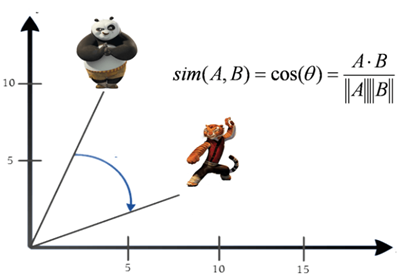

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# vetor de 2 dimensoes (x, y)
po = np.array([[5, 10]])
mestre_tigresa = np.array([[5, 2.5]])

cosine_similarity(po, mestre_tigresa)[0[]0]

0.7999999999999999

In [ ]:
v1 = np.array([[0, 0]])
v2 = np.array([[1, 1]])

cosine_similarity(v1, v2)[0][0]

0.0

## Representação *One-Hot*

Palavras e documentos são representados por vetores de dimensão do tamanho do vocabulário. Os vetores assumem valores binários (0 ou 1)

Mais Informações: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

X = [["no"], ["meio"], ["do"], ["caminho"], ["tinha"], ["uma"], ["pedra"]]

enc.fit(X)
vocab = list(enc.categories_[0])
vetores = enc.transform(X).toarray()

print('Vocabulario: ', vocab)
print()
print('Vetores')
vetores

Vocabulario:  ['caminho', 'do', 'meio', 'no', 'pedra', 'tinha', 'uma']

Vetores


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.]])

Vetor One-Hot de *pedra*

In [ ]:
vetores[vocab.index('pedra')]

array([0., 0., 0., 0., 0., 1., 0.])

## Hipótese Distributiva

Formulada pela primeira vez pelos linguistas Joos (1950), Harris (1954) e Firth (1957).


Assume que palavras semelhantes (e.g., oculista e oftalmologista) tendem a ocorrer no mesmo contexto (e.g., próximas de palavras como olhos e examinar).


A diferença de significado entre 2 palavras corresponde à diferença entre seus contextos.

## Matriz de Frequência Termo-Documento

Dado um vocabulário e um conjunto de documentos, as representações das palavras e dos documentos podem ser calculadas a partir da contagem de cada palavra em cada documento.

Mais informações: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

vectorizer = CountVectorizer()

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores.toarray())

Vocabulario
['caminho' 'do' 'meio' 'no' 'pedra' 'tinha' 'uma']

Matriz
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1]]


Acessando o vetor da palavra *meio*

In [ ]:
vetores[:, list(vocab).index('meio')].transpose().toarray()

array([[1, 1, 0, 1]])

Acessando o vetor do verso 3: *tinha uma pedra*

In [ ]:
vetores[2, :].toarray()

array([[0, 0, 0, 0, 1, 1, 1]])

Customizando o contador com um tokenizador próprio:

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize(texto):
  return nltk.word_tokenize(texto, language='portuguese')

vectorizer = CountVectorizer(tokenizer=tokenize)

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores.toarray());

Vocabulario
['caminho' 'do' 'meio' 'no' 'pedra' 'tinha' 'uma']

Matriz
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1]]


## Matriz Termo-Termo

Dado um vocabulário, a representação de uma palavra pode ser calculada a partir da contagem de sua **coocorrência** com cada palavra do vocabulário num determinado contexto (e.g. documento, sentença etc.).

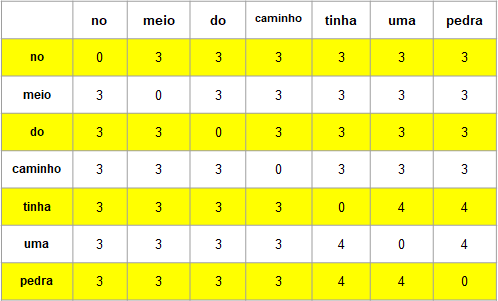

In [ ]:
corpus = ['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

corpus_tok = [verso.split() for verso in corpus]

vocab = ["no", "meio", "do", "caminho", "tinha", "uma", "pedra"]
vetores = np.zeros((len(vocab), len(vocab)))

for verso in corpus_tok:
  for i, w1 in enumerate(vocab):
    for j, w2 in enumerate(vocab):
      if i != j:
        if w1 in verso and w2 in verso:
          vetores[i, j] += 1

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores)

Vocabulario
['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra']

Matriz
[[0. 3. 3. 3. 3. 3. 3.]
 [3. 0. 3. 3. 3. 3. 3.]
 [3. 3. 0. 3. 3. 3. 3.]
 [3. 3. 3. 0. 3. 3. 3.]
 [3. 3. 3. 3. 0. 4. 4.]
 [3. 3. 3. 3. 4. 0. 4.]
 [3. 3. 3. 3. 4. 4. 0.]]


## Remoção de *stopwords*

Palavras muito frequentes recebem um peso maior, apesar de não serem boas variáveis para distinguir documentos.

*Stopwords* (e.g., artigos, preposições etc.), que possuem alta frequência em todos os documentos, podem ser removidas da contagem para melhorar a distinção entre documentos.

Por exemplo, a dimensão da palavra bom não é boa para distinguir os documentos, já que possui alta frequência em todos eles.

Frequência de 4 palavras em 4 peças teatrais de William Shakespeare:

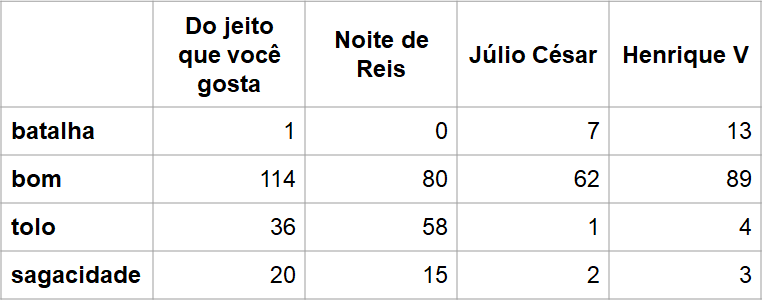

In [ ]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

vectorizer = CountVectorizer(stop_words=stopwords)

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores.toarray())

Vocabulario
['caminho' 'meio' 'pedra']

Matriz
[[1 1 1]
 [1 1 1]
 [0 0 1]
 [1 1 1]]


## TF-IDF

Mais informações: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

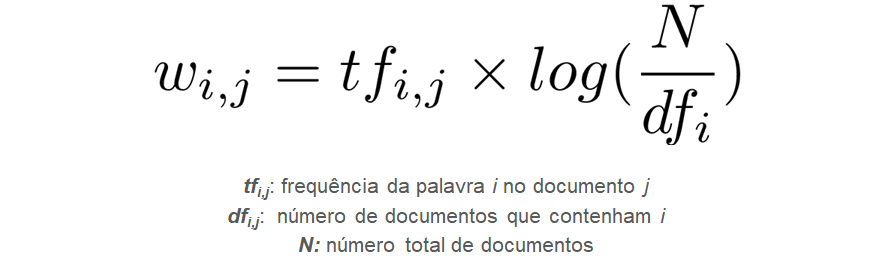

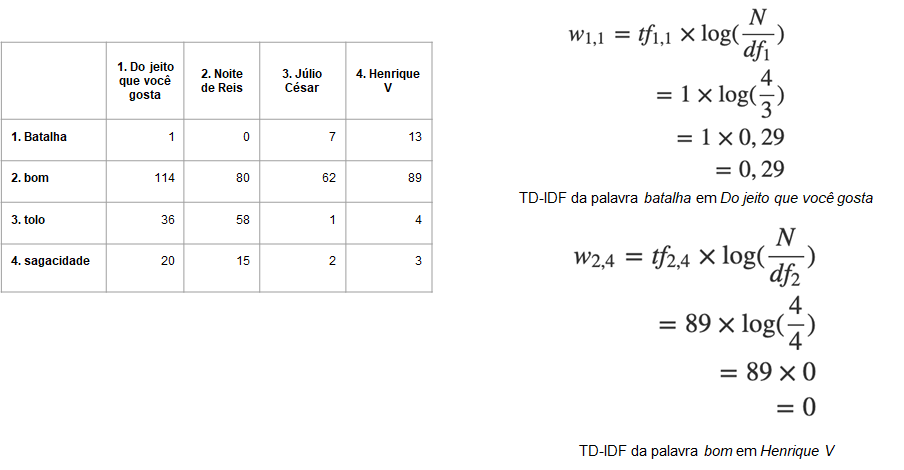

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

corpus = ['ainda que mal pergunte',
 'ainda que mal respondas',
 'ainda que mal te entenda',
 'ainda que mal repitas']

vectorizer = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())])

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer['count'].get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(np.round(vetores.toarray(), 2))

Vocabulario
['ainda' 'entenda' 'mal' 'pergunte' 'que' 'repitas' 'respondas' 'te']

Matriz
[[0.39 0.   0.39 0.74 0.39 0.   0.   0.  ]
 [0.39 0.   0.39 0.   0.39 0.   0.74 0.  ]
 [0.31 0.6  0.31 0.   0.31 0.   0.   0.6 ]
 [0.39 0.   0.39 0.   0.39 0.74 0.   0.  ]]


Acessando o primeiro (*ainda que mal pergunte*) e terceiro (*ainda que mal te entenda*) versos e calculando a similaridade entre eles.

In [ ]:
verso1 = vetores[0, :]
verso3 = vetores[2, :]

cosine_similarity(verso1, verso3)[0][0]

0.3611073242896012

**REFERÊNCIA**

---

Notebook adaptado a partir dos slides do curso online **Linguística Computacional** elaborado por discentes e docentes do Departamento de Ciência da Computação da UFMG, gentilmente cedido pelo professor **Thiago Castro Ferreira**.

Disponível a partir da **Aula 5: Representações Vetoriais para Palavras, Sentenças e Documentos**

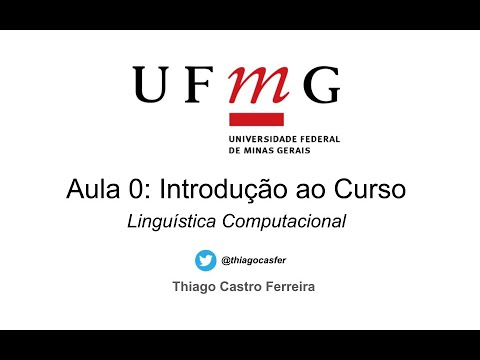

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('T4_J6Q2E4k0', width=550, height=310))